<a href="https://colab.research.google.com/github/PaulinaRuizB/Machine_Learning_Theory/blob/main/Tarea_5_Database_Housing_y_prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import BayesianRidge

In [ ]:
#función cálculo varianza del ruido a partir del snr dB
def var_snr(x,snrdB): #x vector de datos (señal), snrdB SNR en dB
    Px = np.mean(x**2)#estimador potencia media de la señal
    return Px/(10**(snrdB/10))

## Función Sinc

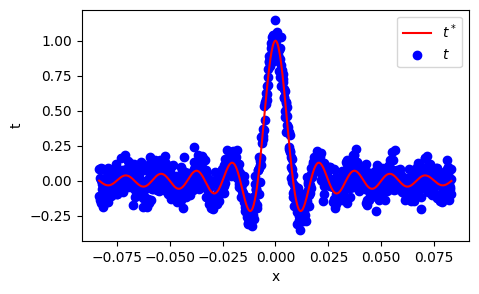

In [ ]:
#datos simulados
Fo = 60 #frecuencia fundamental señal cos
A = 1 # amplitud de la señal
To = 1/Fo #periodo fundamental
Fs = 100*Fo #frecuencia muestreo según nyquist Fs >= 2 Fo
X = np.arange(-5*To,5*To,1/Fs) #vector de entrada en un periodo con pasos según período de muestreo

snrdB = 10 #ruido según SNR dB

#señal limpia - objetivo
# Use sinc function instead of sin function
tt = A*np.sinc(2*Fo*X)

#modelo con función sinc contaminada con ruido Gaussiano
# Use sinc function instead of sin function
t = A*np.sinc(2*Fo*X) + np.sqrt(var_snr(tt,snrdB))*np.random.randn(len(X))


X = X.reshape(-1,1)#filas = realizaciones-muestras
t = t.reshape(-1,1)

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t^*$')
plt.scatter(X,t,c='b',label='$t$')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.82534e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.08088e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.85908e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.42198e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.33344e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/pytho

Mejores hiperparámetros: {'poly__degree': 30, 'ridge__alpha': 1e-08}
MSE Test: 0.012500375979585207
R2 Test: 0.8122122682452526


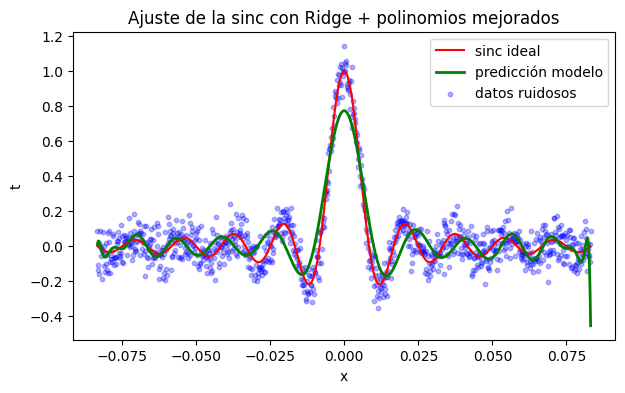

In [ ]:
X = X.reshape(-1, 1)
t = t.reshape(-1, 1)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, t, test_size=0.3, random_state=0, shuffle=True
)

# -------------------------
# Pipeline con escalado + polinomio + Ridge
# -------------------------
pipeline = Pipeline([
    ("scaler", StandardScaler()),        # Normalización
    ("poly", PolynomialFeatures(include_bias=False)),
    ("ridge", Ridge())
])

# Grid de búsqueda ampliado
param_grid = {
    "poly__degree": [5, 10, 15, 20, 25, 30],
    "ridge__alpha": [1e-8, 1e-6, 1e-4, 1e-2, 1, 10]
}

cv = KFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train.ravel())

print("Mejores hiperparámetros:", grid.best_params_)

best_model = grid.best_estimator_

# Evaluación
y_pred = best_model.predict(X_test)
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("R2 Test:", r2_score(y_test, y_pred))

# -------------------------
# Visualizar ajuste
# -------------------------
X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1,1)
y_true_plot = A * np.sinc(2 * Fo * X_plot.flatten())
y_pred_plot = best_model.predict(X_plot)

plt.figure(figsize=(7,4))
plt.plot(X_plot, y_true_plot, 'r', label='sinc ideal')
plt.plot(X_plot, y_pred_plot, 'g', linewidth=2, label='predicción modelo')
plt.scatter(X, t, c='b', s=10, alpha=0.3, label='datos ruidosos')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Ajuste de la sinc con Ridge + polinomios mejorados')
plt.show()


## Base de datos California Housing

Dimensiones: (20640, 8) (20640,)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

=== Baseline Ridge (sin polinomios) ===
Mejor alpha: 1
Test MSE : 0.5558548589435974
Test RMSE: 0.5558548589435974
Test MAE : 0.5331931195789733
Test R2  : 0.575815742891368

=== Mejor modelo (Poly+Ridge) ===
Mejores hiperparámetros: {'poly__degree': 1, 'ridge__alpha': 1}

=== Métricas en Test (Poly+Ridge) ===
MSE : 0.555855
RMSE: 0.555855
MAE : 0.533193
R2  : 0.575816


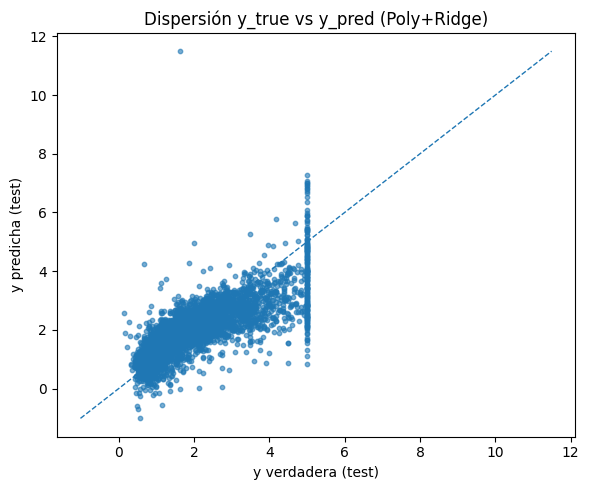

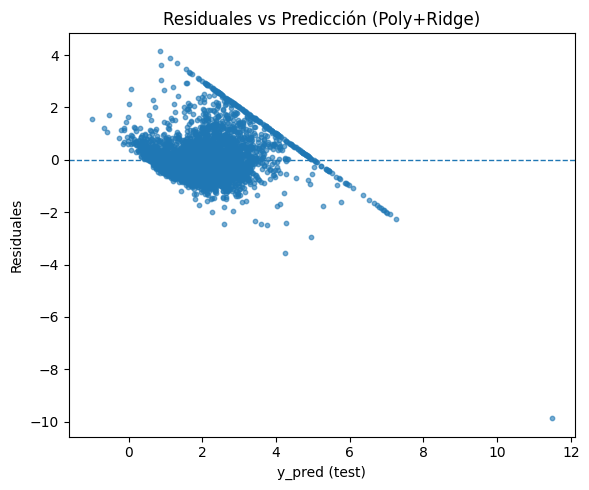

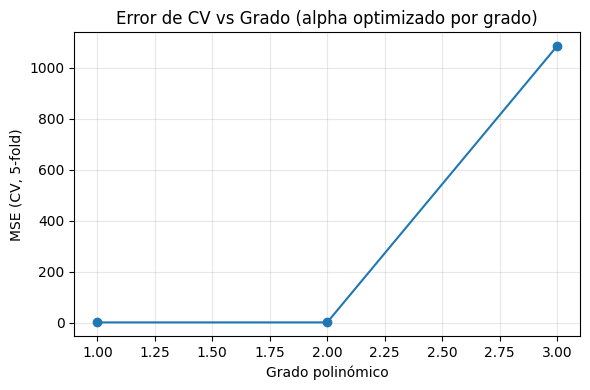

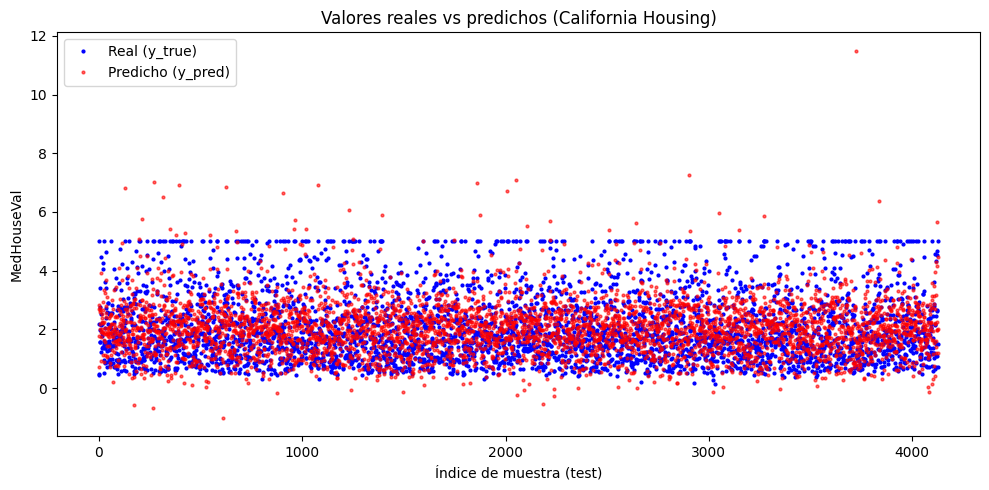

Grado 1: MSE_CV = 0.519326
Grado 2: MSE_CV = 0.554404
Grado 3: MSE_CV = 1084.252417

Modelo final de despliegue entrenado con TODO el dataset.
Hiperparámetros usados: {'poly__degree': 1, 'ridge__alpha': 1}


In [ ]:
# ============================================
# California Housing: Ridge + Polinomios (con CV)
# ============================================


warnings.filterwarnings("ignore")

# -------------------------
# Configuración general
# -------------------------
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Si quieres estabilizar varianza del target:
USE_LOG_TARGET = False  # <- pon True para usar log1p en y

# -------------------------
# Carga de datos
# -------------------------
housing = fetch_california_housing()
X = housing.data                  # (n_samples, 8)
y = housing.target.astype(float)  # MedHouseVal

feature_names = housing.feature_names
print("Dimensiones:", X.shape, y.shape)
print("Features:", feature_names)

# Transformación opcional del target
def fwd_y(u):
    return np.log1p(u) if USE_LOG_TARGET else u

def inv_y(u):
    return np.expm1(u) if USE_LOG_TARGET else u

y_work = fwd_y(y)

# -------------------------
# Split train/test (sin fuga)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_work, test_size=0.2, shuffle=True, random_state=RANDOM_STATE
)

# -------------------------
# Baseline simple (sin polinomios)
# -------------------------
baseline = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

baseline_grid = {"ridge__alpha": [1e-6, 1e-4, 1e-2, 1, 10, 100]}
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

g_base = GridSearchCV(
    baseline, baseline_grid, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1, refit=True
)
g_base.fit(X_train, y_train)
y_pred_base_test = inv_y(g_base.predict(X_test))

print("\n=== Baseline Ridge (sin polinomios) ===")
print("Mejor alpha:", g_base.best_params_["ridge__alpha"])
print("Test MSE :", mean_squared_error(inv_y(y_test), y_pred_base_test))
print("Test RMSE:", mean_squared_error(inv_y(y_test), y_pred_base_test))
print("Test MAE :", mean_absolute_error(inv_y(y_test), y_pred_base_test))
print("Test R2  :", r2_score(inv_y(y_test), y_pred_base_test))

# -------------------------
# Pipeline principal (Scaler + Poly + Ridge)
# -------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),  # grado se elige en la grilla
    ("ridge", Ridge())
])

# OJO: con 8 features, grado 3 ya es grande; ajusta si tu equipo es modesto
param_grid = {
    "poly__degree": [1, 2, 3],
    "ridge__alpha": [1e-6, 1e-4, 1e-2, 1, 10, 100]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    refit=True,
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_
print("\n=== Mejor modelo (Poly+Ridge) ===")
print("Mejores hiperparámetros:", best_params)

# -------------------------
# Evaluación honesta en test
# -------------------------
y_pred_test = inv_y(best_model.predict(X_test))
y_true_test = inv_y(y_test)

mse  = mean_squared_error(y_true_test, y_pred_test)
rmse = mean_squared_error(y_true_test, y_pred_test)
mae  = mean_absolute_error(y_true_test, y_pred_test)
r2   = r2_score(y_true_test, y_pred_test)

print("\n=== Métricas en Test (Poly+Ridge) ===")
print(f"MSE : {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"MAE : {mae:.6f}")
print(f"R2  : {r2:.6f}")

# -------------------------
# Diagnósticos gráficos
# -------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_true_test, y_pred_test, s=10, alpha=0.6)
ymin, ymax = min(y_true_test.min(), y_pred_test.min()), max(y_true_test.max(), y_pred_test.max())
plt.plot([ymin, ymax], [ymin, ymax], linestyle='--', linewidth=1)
plt.xlabel("y verdadera (test)")
plt.ylabel("y predicha (test)")
plt.title("Dispersión y_true vs y_pred (Poly+Ridge)")
plt.tight_layout()
plt.show()

resid = y_true_test - y_pred_test
plt.figure(figsize=(6,5))
plt.scatter(y_pred_test, resid, s=10, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.xlabel("y_pred (test)")
plt.ylabel("Residuales")
plt.title("Residuales vs Predicción (Poly+Ridge)")
plt.tight_layout()
plt.show()

# -------------------------
# Curva simple: MSE CV vs grado (alpha optimizado por grado)
# -------------------------
deg_list = [1, 2, 3]
cv_mse = []

for deg in deg_list:
    sub_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=deg, include_bias=False)),
        ("ridge", Ridge())
    ])
    sub_grid = GridSearchCV(
        sub_pipe,
        {"ridge__alpha": [1e-6, 1e-4, 1e-2, 1, 10, 100]},
        cv=cv,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        refit=True
    )
    sub_grid.fit(X_train, y_train)
    cv_mse.append(-sub_grid.best_score_)

plt.figure(figsize=(6,4))
plt.plot(deg_list, cv_mse, marker='o')
plt.xlabel("Grado polinómico")
plt.ylabel("MSE (CV, 5-fold)")
plt.title("Error de CV vs Grado (alpha optimizado por grado)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================
# Comparación directa y_true vs y_pred
# ============================

# Para graficar ordenadamente, usamos el mismo orden que en el test
idx = np.arange(len(y_true_test))

plt.figure(figsize=(10,5))
plt.plot(idx, y_true_test, 'b.', markersize=4, label="Real (y_true)")
plt.plot(idx, y_pred_test, 'r.', markersize=4, alpha=0.6, label="Predicho (y_pred)")

plt.xlabel("Índice de muestra (test)")
plt.ylabel("MedHouseVal")
plt.title("Valores reales vs predichos (California Housing)")
plt.legend()
plt.tight_layout()
plt.show()


for d, m in zip(deg_list, cv_mse):
    print(f"Grado {d}: MSE_CV = {m:.6f}")

# -------------------------
# Reentrenar con TODOS los datos (modelo final de despliegue)
# -------------------------
# Usamos los hiperparámetros ganadores para entrenar en todo el dataset.
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=best_params["poly__degree"], include_bias=False)),
    ("ridge", Ridge(alpha=best_params["ridge__alpha"]))
])

final_model.fit(X, y_work)
print("\nModelo final de despliegue entrenado con TODO el dataset.")
print("Hiperparámetros usados:", best_params)

# Ejemplo de predicción nueva (en escala original del target):
# y_hat = inv_y(final_model.predict(X[:5]))
# print("Predicciones ejemplo:", y_hat)


## Animación

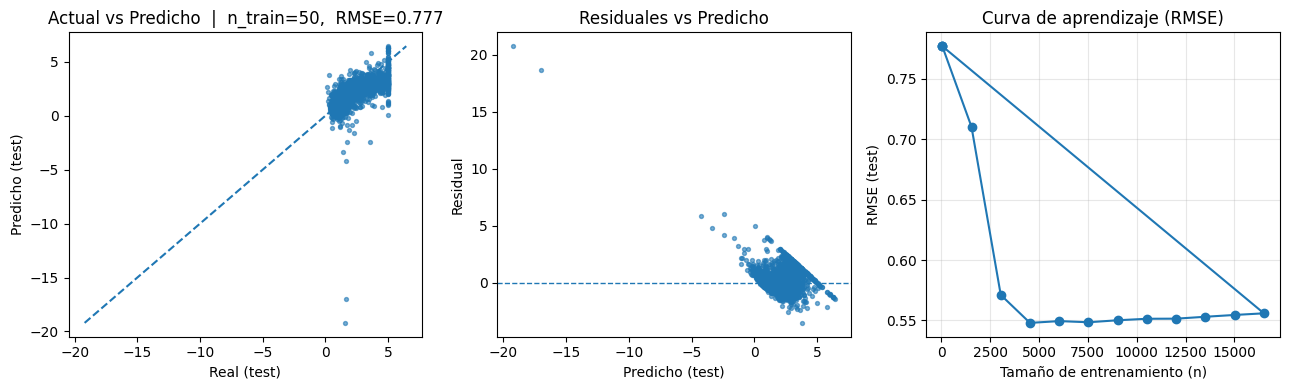

In [ ]:
# ============================================
# ANIMACIÓN: mejora del modelo al crecer n_train
# (usa tus mejores hiperparámetros encontrados por GridSearch)
# ============================================
from matplotlib import animation, rc
from IPython.display import HTML

# Pipeline fijo con los hiperparámetros óptimos encontrados
pipe_anim = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=best_params["poly__degree"], include_bias=False)),
    ("ridge", Ridge(alpha=best_params["ridge__alpha"]))
])

# Barajamos el train para ir agregando datos incrementalmente
rng = np.random.RandomState(RANDOM_STATE)
perm = rng.permutation(len(X_train))
X_train_shuf = X_train[perm]
y_train_shuf = y_train[perm]

# Tamaños de entrenamiento que animaremos
# (ajusta la lista si quieres más/menos frames)
frames_sizes = np.unique(
    np.linspace(50, len(X_train), num=12, dtype=int)
)

# Figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(13,4))
ax_scatter, ax_resid, ax_curve = axes

rmse_hist, n_hist = [], []

def update(frame_idx):
    ax_scatter.clear(); ax_resid.clear(); ax_curve.clear()
    n = int(frames_sizes[frame_idx])

    # Entrenar con las primeras n muestras barajadas
    pipe_anim.fit(X_train_shuf[:n], y_train_shuf[:n])

    # Predicción en test en escala original del target
    y_pred_test = inv_y(pipe_anim.predict(X_test))
    y_true_test = inv_y(y_test)

    # Métrica para curva de aprendizaje
    rmse = mean_squared_error(y_true_test, y_pred_test)
    rmse_hist.append(rmse); n_hist.append(n)

    # -------- Panel 1: Real vs Predicho --------
    ax_scatter.scatter(y_true_test, y_pred_test, s=8, alpha=0.6)
    m = min(y_true_test.min(), y_pred_test.min())
    M = max(y_true_test.max(), y_pred_test.max())
    ax_scatter.plot([m, M], [m, M], linestyle='--')
    ax_scatter.set_xlabel("Real (test)")
    ax_scatter.set_ylabel("Predicho (test)")
    ax_scatter.set_title(f"Actual vs Predicho  |  n_train={n},  RMSE={rmse:.3f}")

    # -------- Panel 2: Residuales vs Predicho --------
    resid = y_true_test - y_pred_test
    ax_resid.scatter(y_pred_test, resid, s=8, alpha=0.6)
    ax_resid.axhline(0, linestyle='--', linewidth=1)
    ax_resid.set_xlabel("Predicho (test)")
    ax_resid.set_ylabel("Residual")
    ax_resid.set_title("Residuales vs Predicho")

    # -------- Panel 3: Curva de aprendizaje --------
    ax_curve.plot(n_hist, rmse_hist, marker='o')
    ax_curve.set_xlabel("Tamaño de entrenamiento (n)")
    ax_curve.set_ylabel("RMSE (test)")
    ax_curve.set_title("Curva de aprendizaje (RMSE)")
    ax_curve.grid(alpha=0.3)

    plt.tight_layout()

# Crear y mostrar animación (en notebooks Jupyter/Colab)
anim = animation.FuncAnimation(
    fig, update, frames=np.arange(len(frames_sizes)),
    interval=800, blit=False, repeat=False
)
rc('animation', html='jshtml')
HTML(anim.to_jshtml())


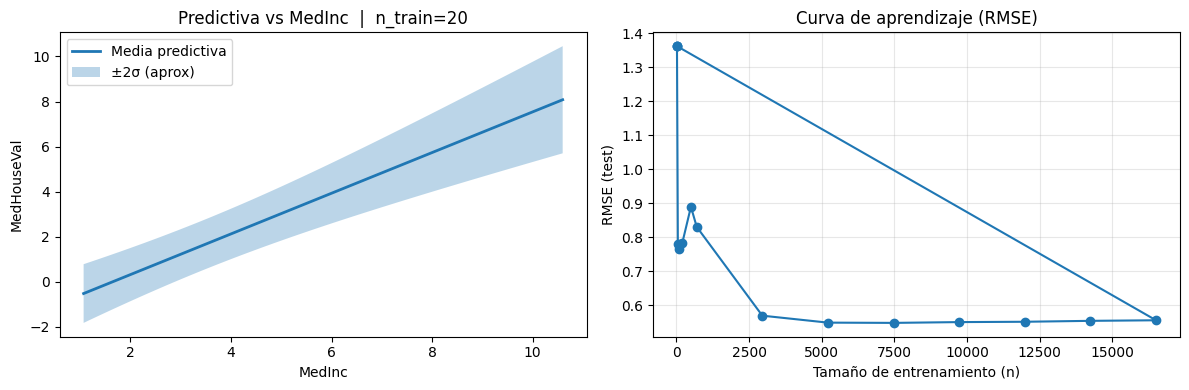

In [ ]:
# ============================================
# ANIMACIÓN: Predictiva con incertidumbre (BayesianRidge) en un slice 1D
# ============================================

# --- CONFIG ---
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Feature a variar en el slice 1D (cámbiala si quieres)
feat_name = "MedInc"   # por ejemplo: "Latitude", "Longitude", "AveRooms", etc.
j = feature_names.index(feat_name)

# Rango del slice (puedes ajustar a percentiles para evitar outliers)
low, high = np.percentile(X[:, j], [1, 99])
grid = np.linspace(low, high, 250)

# Plantilla con medias en el resto de features
X_mean = X.mean(axis=0)
def make_slice(grid_vals):
    Xg = np.tile(X_mean, (len(grid_vals), 1))
    Xg[:, j] = grid_vals
    return Xg

# Pipeline: escalado + BayesianRidge
pipe_bayes = Pipeline([
    ("scaler", StandardScaler()),
    ("bayes",  BayesianRidge())   # parámetros por defecto suelen ir bien
])

# Barajamos train para ir aumentando n
rng = np.random.RandomState(RANDOM_STATE)
perm = rng.permutation(len(X_train))
X_train_shuf = X_train[perm]
y_train_shuf = y_train[perm]   # ¡OJO! y_train está ya en espacio fwd_y

# Tamaños de entrenamiento por frame (ajusta si quieres más/menos frames)
frames_sizes = np.unique(
    np.concatenate([np.array([20, 50, 100, 200, 500]),
                    np.linspace(700, len(X_train), 8, dtype=int)])
)

# Figura: (1) Slice con bandas ±2σ  (2) Curva RMSE vs n_train
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax_slice, ax_curve = axes
rmse_hist, n_hist = [], []

def update(frame_idx):
    ax_slice.clear(); ax_curve.clear()
    n = int(frames_sizes[frame_idx])

    # Entrenamos con las primeras n muestras
    pipe_bayes.fit(X_train_shuf[:n], y_train_shuf[:n])

    # --- Curva de aprendizaje en test (RMSE en escala original) ---
    y_pred_test = inv_y(pipe_bayes.predict(X_test))
    rmse = mean_squared_error(inv_y(y_test), y_pred_test)
    rmse_hist.append(rmse); n_hist.append(n)

    # --- Slice 1D: media y desviación de la predictiva ---
    Xg = make_slice(grid)

    # Importante: para std debemos transformar Xg con el scaler y
    # llamar a predict del estimador bayesiano directamente.
    Zg = pipe_bayes.named_steps["scaler"].transform(Xg)
    y_mean_fwd, y_std_fwd = pipe_bayes.named_steps["bayes"].predict(Zg, return_std=True)

    # Volvemos a la escala original del target
    y_mean = inv_y(y_mean_fwd)

    # Nota: tras inv_y (si USE_LOG_TARGET=True), la std ya no es exacta en la escala original.
    # La usamos como guía visual: bandas aproximadas ±2σ
    y_upper = y_mean + 2*y_std_fwd
    y_lower = y_mean - 2*y_std_fwd

    # --- Panel 1: Predictiva con bandas ---
    ax_slice.plot(grid, y_mean, linewidth=2, label="Media predictiva")
    ax_slice.fill_between(grid, y_lower, y_upper, alpha=0.3, label="±2σ (aprox)")
    ax_slice.set_xlabel(feat_name)
    ax_slice.set_ylabel("MedHouseVal")
    ax_slice.set_title(f"Predictiva vs {feat_name}  |  n_train={n}")
    ax_slice.legend()

    # --- Panel 2: Curva de aprendizaje ---
    ax_curve.plot(n_hist, rmse_hist, marker='o')
    ax_curve.set_xlabel("Tamaño de entrenamiento (n)")
    ax_curve.set_ylabel("RMSE (test)")
    ax_curve.set_title("Curva de aprendizaje (RMSE)")
    ax_curve.grid(alpha=0.3)

    plt.tight_layout()

anim_bayes = animation.FuncAnimation(
    fig, update,
    frames=np.arange(len(frames_sizes)),
    interval=800, blit=False, repeat=False
)
rc('animation', html='jshtml')
HTML(anim_bayes.to_jshtml())
